# Ekstraksi Fitur
Ekstraksi fitur pada teks adalah kunci untuk mengubah teks menjadi bentuk yang dapat dipahami oleh algoritma machine learning, yaitu numerik.
Berikut adalah beberapa teknik umum yang digunakan untuk ekstraksi fitur pada teks.
1. Word Embedding
2. Term Frequency-Inverse Document Frequency (TF-IDF)
3. Bag of Words (BoW)
4. N-gram
5. POS Tagging (Part of Speech Tagging)
6. Entity Recognition
7. Pola atau Pola Kata (Pattern Matching)

### Word Embedding
Word embedding adalah teknik dalam NLP untuk merepresentasikan distribusi kata-kata di ruang vektor. Setiap kata direpresentasikan sebagai vektor numerik berdimensi rendah, yakni setiap dimensi vektor menunjukkan fitur atau atribut tertentu dari kata tersebut.

Tujuan utama dari word embedding adalah menangkap hubungan semantik dan sintaktis antarkata dalam teks.

##### Word2Vec
Word2Vec melatih model neural network untuk memprediksi kata berikutnya berdasarkan kata-kata sekitarnya (skip-gram) atau sebaliknya (continuous bag of words, CBOW). Proses ini menghasilkan vektor representasi kata yang menyandikan makna kata berdasarkan konteks kata tersebut muncul.

In [3]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/yelf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
text_data = [
    'Saya suka makan bakso',
    'Bakso enak dan lezat',
    'Makanan favorit saya adalah nasi goreng',
    'Nasi goreng pedas adalah makanan favorit saya',
    'Saya suka makanan manis seperti es krim',
]
[text for text in text_data]

['Saya suka makan bakso',
 'Bakso enak dan lezat',
 'Makanan favorit saya adalah nasi goreng',
 'Nasi goreng pedas adalah makanan favorit saya',
 'Saya suka makanan manis seperti es krim']

In [9]:
tokenized_data = [word_tokenize(sentence.lower()) for sentence in text_data]
[text for text in tokenized_data]

[['saya', 'suka', 'makan', 'bakso'],
 ['bakso', 'enak', 'dan', 'lezat'],
 ['makanan', 'favorit', 'saya', 'adalah', 'nasi', 'goreng'],
 ['nasi', 'goreng', 'pedas', 'adalah', 'makanan', 'favorit', 'saya'],
 ['saya', 'suka', 'makanan', 'manis', 'seperti', 'es', 'krim']]

In [36]:
model_word2vec = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)

In [37]:
word_vectors = model_word2vec.wv

word = 'bakso'
similar_words = word_vectors.most_similar(word, topn=3)
print("kata-kata yang mirip dengan {} : {}".format(word, similar_words))

kata-kata yang mirip dengan bakso : [('manis', 0.2529163062572479), ('nasi', 0.17018672823905945), ('enak', 0.15006466209888458)]


In [38]:
vector = word_vectors[word]
print("Vektor untuk '{}': {}".format(word, vector))

Vektor untuk 'bakso': [-0.00713882  0.00124156 -0.00717766 -0.00224369  0.00371885  0.00583258
  0.00119832  0.00210183 -0.00411138  0.00722588 -0.00630644  0.00464789
 -0.00821918  0.00203677 -0.00497649 -0.00424685 -0.00310906  0.00565491
  0.00579776 -0.00497439  0.00077378 -0.0084959   0.00780977  0.00925648
 -0.00274235  0.0007995   0.00074748  0.00547704 -0.00860589  0.00058358
  0.00687019  0.00223141  0.00112457 -0.00932216  0.00848288 -0.0062632
 -0.00299165  0.00349458 -0.00077282  0.00141124  0.00178217 -0.00682961
 -0.00972456  0.00904072  0.00619895 -0.00691193  0.00340259  0.00020664
  0.00475438 -0.00712046  0.00402629  0.00434812  0.00995727 -0.00447314
 -0.00138943 -0.00731689 -0.00969748 -0.00908048 -0.00102362 -0.00650396
  0.0048507  -0.00616346  0.0025184   0.00073924 -0.00339173 -0.00097928
  0.00997817  0.009146   -0.00446089  0.00908287 -0.00564239  0.00593029
 -0.00309763  0.00343232  0.00301726  0.00690047 -0.00237434  0.00877584
  0.00759023 -0.00954767 -0.00

##### GloVe (Global Vectors for Word Representation)
GloVe adalah metode word embedding untuk menghasilkan vektor representasi kata-kata berdasarkan statistik dari matriks frekuensi kemunculan kata dalam teks (co-occurrence matrix). Ide utama di balik GloVe adalah memahami hubungan antar kata berdasarkan seberapa sering kata-kata tersebut muncul bersama-sama dalam korpus teks.

##### FastText
FastText memecah kata menjadi bagian-bagian lebih kecil, seperti n-grams dan menghitung representasi vektor untuk setiap bagian subword ini. Kemudian, representasi vektor untuk kata diperoleh dengan menggabungkan vektor subword yang membentuk kata tersebut. Pendekatan ini membantu FastText untuk mengatasi variasi morfologi kata-kata dalam teks.

### Term Frequency-Inverse Document Frequency (TF-IDF)
TF-IDF (term frequency-inverse document frequency) adalah sebuah metode  pengolahan teks untuk mengevaluasi seberapa penting sebuah kata pada suatu dokumen dalam konteks korpus atau kumpulan dokumen yang lebih besar. 
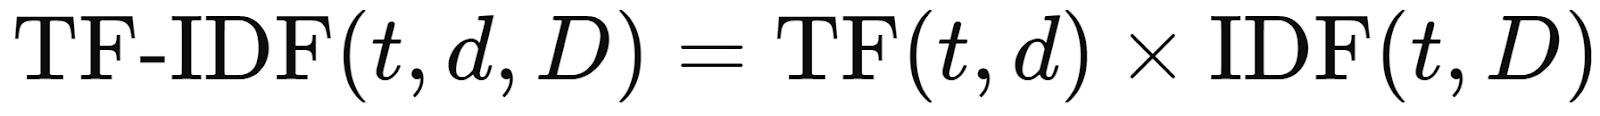

##### Term Frequency (TF)
Term frequency mengukur seberapa sering sebuah kata muncul dalam sebuah dokumen. Ini untuk memberikan bobot lebih tinggi pada kata-kata yang sering muncul dan dianggap lebih penting dalam konteks dokumen tersebut. 
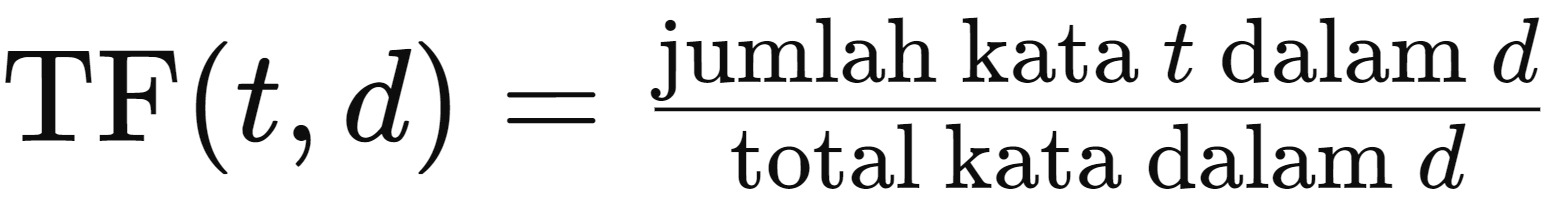

##### Inverse Document Frequency (IDF)
Inverse document frequency mengukur seberapa jarang kata tertentu muncul di seluruh dokumen dalam korpus. Kata-kata yang muncul lebih sedikit pada dokumen dianggap memiliki informasi lebih spesifik atau unik dan mendapatkan bobot yang lebih tinggi melalui IDF.
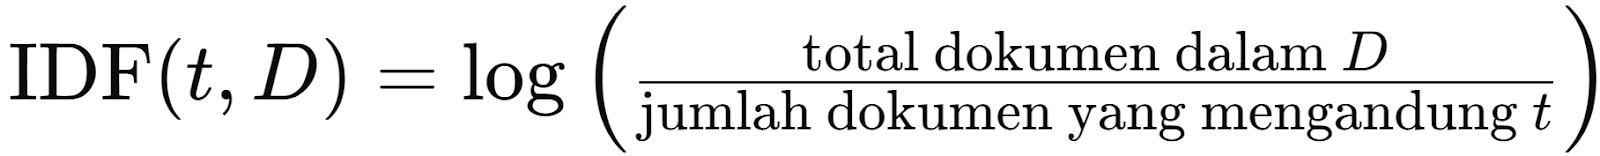

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
documents = [
    "Saya suka makan bakso",
    "Bakso enak dan lezat",
    "Makanan favorit saya adalah nasi goreng",
    "Nasi goreng pedas adalah makanan favorit saya",
    "Saya suka makanan manis seperti es krim",
]
[doc for doc in documents]

['Saya suka makan bakso',
 'Bakso enak dan lezat',
 'Makanan favorit saya adalah nasi goreng',
 'Nasi goreng pedas adalah makanan favorit saya',
 'Saya suka makanan manis seperti es krim']

In [43]:
# inisialisasi objek TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

In [44]:
print("Vocabulary:", tfidf_vectorizer.vocabulary_)

Vocabulary: {'saya': 14, 'suka': 16, 'makan': 9, 'bakso': 1, 'enak': 3, 'dan': 2, 'lezat': 8, 'makanan': 10, 'favorit': 5, 'adalah': 0, 'nasi': 12, 'goreng': 6, 'pedas': 13, 'manis': 11, 'seperti': 15, 'es': 4, 'krim': 7}


In [48]:
print(tfidf_matrix)
print("TF-IDF Matrix:")
print(tfidf_matrix.toarray())

  (0, 14)	0.348109926030819
  (0, 16)	0.498511878090309
  (0, 9)	0.6178926235233461
  (0, 1)	0.498511878090309
  (1, 1)	0.4222421409859579
  (1, 3)	0.5233582502695435
  (1, 2)	0.5233582502695435
  (1, 8)	0.5233582502695435
  (2, 14)	0.30691325428809335
  (2, 10)	0.3648380321234529
  (2, 5)	0.4395160590520495
  (2, 0)	0.4395160590520495
  (2, 12)	0.4395160590520495
  (2, 6)	0.4395160590520495
  (3, 14)	0.26951544116795256
  (3, 10)	0.32038200308644904
  (3, 5)	0.3859604070556704
  (3, 0)	0.3859604070556704
  (3, 12)	0.3859604070556704
  (3, 6)	0.3859604070556704
  (3, 13)	0.47838797624108775
  (4, 14)	0.2420643346631988
  (4, 16)	0.3466489665133793
  (4, 10)	0.2877499562886115
  (4, 11)	0.4296624589591145
  (4, 15)	0.4296624589591145
  (4, 4)	0.4296624589591145
  (4, 7)	0.4296624589591145
TF-IDF Matrix:
[[0.         0.49851188 0.         0.         0.         0.
  0.         0.         0.         0.61789262 0.         0.
  0.         0.         0.34810993 0.         0.49851188]
 [0.    

### Bag of Words (BoW)
Bag of Words (BoW) adalah sebuah pendekatan sederhana dalam pemrosesan teks yang digunakan untuk mewakili teks sebagai kumpulan kata-kata terurut tanpa memperhatikan tata urutan atau struktur kalimat.

Langkah-langkah BoW sebagai berikut.

1. Tokenisasi
    * Kalimat 1: ["saya", "suka", "makan", "nasi", "goreng"]
    * Kalimat 2: ["nasi", "goreng", "adalah", "makanan", "favorit", "saya"]
2. Membuat Vocabulary
    * Kata-kata unik dari kedua kalimat: ["saya", "suka", "makan", "nasi", "goreng", "adalah", "makanan", "favorit"]
3. Representasi Vektor
    * Kalimat 1: [1, 1, 1, 1, 1, 0, 0, 0] (mengindikasikan frekuensi kata dalam vocabulary)
    * Kalimat 2: [1, 0, 1, 1, 1, 1, 1, 1]

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
documents = [
    "Ini adalah contoh dokumen pertama.",
    "Ini adalah dokumen kedua.",
    "Ini adalah dokumen ketiga.",
    "Ini adalah contoh contoh contoh."
]
[doc for doc in documents]

['Ini adalah contoh dokumen pertama.',
 'Ini adalah dokumen kedua.',
 'Ini adalah dokumen ketiga.',
 'Ini adalah contoh contoh contoh.']

In [51]:
# Inisialiasi objek countVectorizer
vectorizer = CountVectorizer()

In [52]:
# Fitting dan tranformasi text to vector
bow_matrix = vectorizer.fit_transform(documents)

In [57]:
vars(bow_matrix)

{'_shape': (4, 7),
 'maxprint': 50,
 'indices': array([3, 0, 1, 2, 6, 3, 0, 2, 4, 3, 0, 2, 5, 3, 0, 1], dtype=int32),
 'indptr': array([ 0,  5,  9, 13, 16], dtype=int32),
 'data': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3])}

In [64]:
print(bow_matrix)

  (0, 3)	1
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 6)	1
  (1, 3)	1
  (1, 0)	1
  (1, 2)	1
  (1, 4)	1
  (2, 3)	1
  (2, 0)	1
  (2, 2)	1
  (2, 5)	1
  (3, 3)	1
  (3, 0)	1
  (3, 1)	3


In [65]:
print(bow_matrix.toarray())

[[1 1 1 1 0 0 1]
 [1 0 1 1 1 0 0]
 [1 0 1 1 0 1 0]
 [1 3 0 1 0 0 0]]


In [67]:
features = vectorizer.get_feature_names_out()
print("Matriks BoW:")
print(bow_matrix.toarray())
 
print("\nDaftar Fitur:")
print(features)

Matriks BoW:
[[1 1 1 1 0 0 1]
 [1 0 1 1 1 0 0]
 [1 0 1 1 0 1 0]
 [1 3 0 1 0 0 0]]

Daftar Fitur:
['adalah' 'contoh' 'dokumen' 'ini' 'kedua' 'ketiga' 'pertama']


### N-gram
N-gram adalah sekumpulan n kata berurutan yang diambil dari sebuah teks atau urutan data. N-gram digunakan pada pemrosesan teks dan pengenalan pola untuk memahami hubungan antar kata dalam teks.
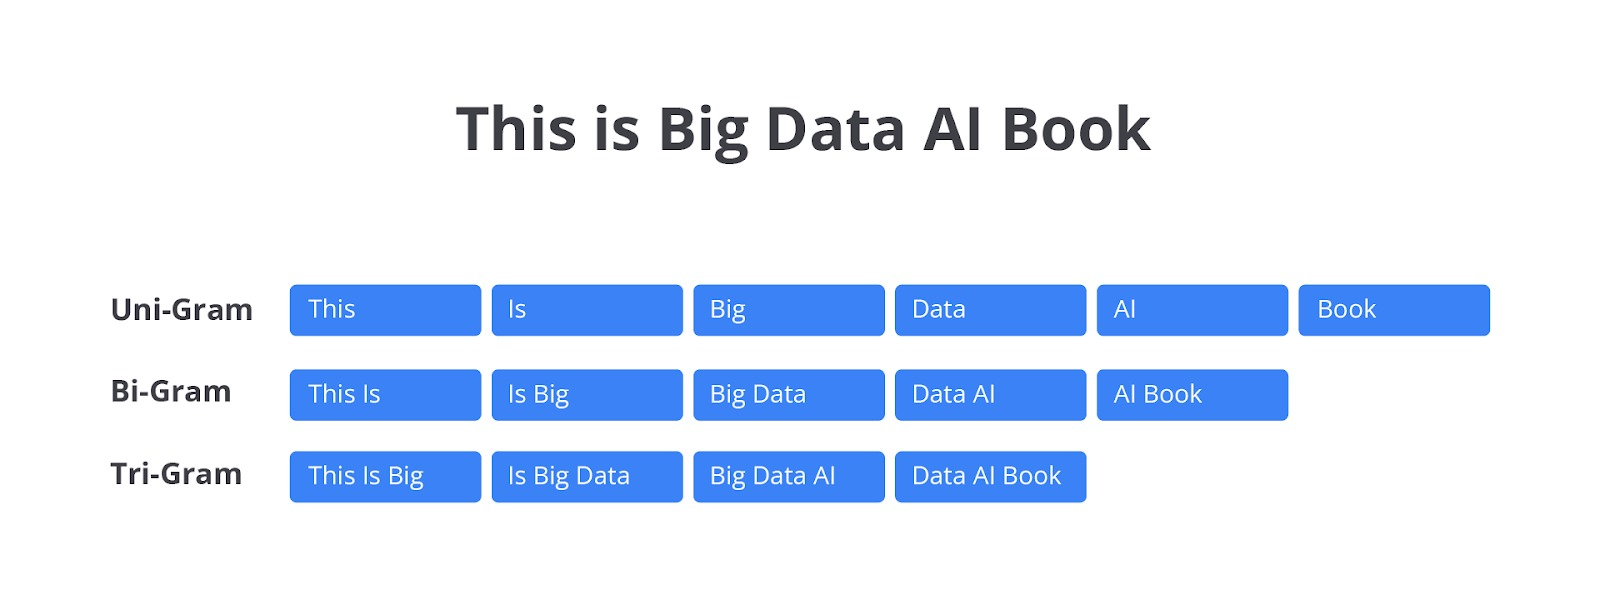

In [68]:
from nltk.util import ngrams

In [69]:
sentences = [
    "Saya suka makan bakso enak di warung dekat rumah.",
    "Nasi goreng adalah salah satu makanan favorit saya.",
    "Es krim coklat sangat lezat dan menyegarkan.",
    "Saat hari hujan, saya suka minum teh hangat.",
    "Pemandangan pegunungan di pagi hari sangat indah.",
    "Bola basket adalah olahraga favorit saya sejak kecil."
]

In [74]:
for sentence in sentences:
    words = sentence.split()
    print(words)
    
    unigrams = list(ngrams(words, 1))
    print(unigrams)
    
    bigrams = list(ngrams(words, 2))
    print(bigrams)
    
    trigrams = list(ngrams(words, 3))
    print(trigrams)
    
    print("\n")

['Saya', 'suka', 'makan', 'bakso', 'enak', 'di', 'warung', 'dekat', 'rumah.']
[('Saya',), ('suka',), ('makan',), ('bakso',), ('enak',), ('di',), ('warung',), ('dekat',), ('rumah.',)]
[('Saya', 'suka'), ('suka', 'makan'), ('makan', 'bakso'), ('bakso', 'enak'), ('enak', 'di'), ('di', 'warung'), ('warung', 'dekat'), ('dekat', 'rumah.')]
[('Saya', 'suka', 'makan'), ('suka', 'makan', 'bakso'), ('makan', 'bakso', 'enak'), ('bakso', 'enak', 'di'), ('enak', 'di', 'warung'), ('di', 'warung', 'dekat'), ('warung', 'dekat', 'rumah.')]


['Nasi', 'goreng', 'adalah', 'salah', 'satu', 'makanan', 'favorit', 'saya.']
[('Nasi',), ('goreng',), ('adalah',), ('salah',), ('satu',), ('makanan',), ('favorit',), ('saya.',)]
[('Nasi', 'goreng'), ('goreng', 'adalah'), ('adalah', 'salah'), ('salah', 'satu'), ('satu', 'makanan'), ('makanan', 'favorit'), ('favorit', 'saya.')]
[('Nasi', 'goreng', 'adalah'), ('goreng', 'adalah', 'salah'), ('adalah', 'salah', 'satu'), ('salah', 'satu', 'makanan'), ('satu', 'makanan', 

In [75]:
print("\nKalimat:", sentence)
print("1-gram:")
for gram in unigrams:
    print(gram)
print("\n2-gram:")
for gram in bigrams:
    print(gram)
print("\n3-gram:")
for gram in trigrams:
    print(gram)


Kalimat: Bola basket adalah olahraga favorit saya sejak kecil.
1-gram:
('Bola',)
('basket',)
('adalah',)
('olahraga',)
('favorit',)
('saya',)
('sejak',)
('kecil.',)

2-gram:
('Bola', 'basket')
('basket', 'adalah')
('adalah', 'olahraga')
('olahraga', 'favorit')
('favorit', 'saya')
('saya', 'sejak')
('sejak', 'kecil.')

3-gram:
('Bola', 'basket', 'adalah')
('basket', 'adalah', 'olahraga')
('adalah', 'olahraga', 'favorit')
('olahraga', 'favorit', 'saya')
('favorit', 'saya', 'sejak')
('saya', 'sejak', 'kecil.')
